<a href="https://colab.research.google.com/github/Achlys2004/ML_PESU_IO/blob/main/IO_ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data PreProcessing


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.impute import SimpleImputer



dataset = pd.read_csv('Book1.csv',low_memory=False)
dataset1=pd.read_csv('Book2.csv',low_memory=False)



In [2]:
dataset

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,Ball_Speed,Byes,runs_off_bat
0,1389389,2023/24,9/24/2023,"Holkar Cricket Stadium, Indore",1,0.1,India,Australia,RD Gaikwad,Shubman Gill,SH Johnson,130.0,1.0,2
1,1389389,2023/24,9/24/2023,"Holkar Cricket Stadium, Indore",1,0.2,India,Australia,RD Gaikwad,Shubman Gill,SH Johnson,NaN,NaN,2
2,1389389,2023/24,9/24/2023,"Holkar Cricket Stadium, Indore",1,0.3,India,Australia,RD Gaikwad,Shubman Gill,SH Johnson,144.0,1.0,2
3,1389389,2023/24,9/24/2023,"Holkar Cricket Stadium, Indore",1,0.4,India,Australia,RD Gaikwad,Shubman Gill,SH Johnson,147.0,3.0,1
4,1389389,2023/24,9/24/2023,"Holkar Cricket Stadium, Indore",1,0.5,India,Australia,RD Gaikwad,Shubman Gill,SH Johnson,135.0,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,1336129,2023,9/23/2023,"Trent Bridge, Nottingham",2,32.1,Ireland,England,BJ McCarthy,CA Young,TW Hartley,94.0,3.0,6
995,1336129,2023,9/23/2023,"Trent Bridge, Nottingham",2,32.2,Ireland,England,CA Young,BJ McCarthy,TW Hartley,93.0,1.0,5
996,1336129,2023,9/23/2023,"Trent Bridge, Nottingham",2,32.3,Ireland,England,CA Young,BJ McCarthy,TW Hartley,100.0,3.0,3
997,1336129,2023,9/23/2023,"Trent Bridge, Nottingham",2,32.4,Ireland,England,CA Young,BJ McCarthy,TW Hartley,94.0,4.0,6


In [3]:
dataset1


,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1389389,2023/24,Indore,24-09-2023,India,Australia,Australia,field,D/L,1,India,99,0,SS Iyer,"Holkar Cricket Stadium, Indore",J Madanagopal,HDPK Dharmasena,KN Ananthapadmanabhan
1,1336129,2023,Nottingham,23-09-2023,England,Ireland,Ireland,field,normal,0,England,48,0,WG Jacks,"Trent Bridge, Nottingham",DJ Millns,RJ Tucker,PR Reiffel
2,1395701,2023,Dhaka,23-09-2023,New Zealand,Bangladesh,New Zealand,bat,normal,0,New Zealand,86,0,IS Sodhi,"Shere Bangla National Stadium, Mirpur",M Erasmus,Sharfuddoula,Nitin Menon
3,1389388,2023/24,Chandigarh,22-09-2023,Australia,India,India,field,normal,0,India,0,5,Mohammed Shami,"Punjab Cricket Association IS Bindra Stadium, ...",KN Ananthapadmanabhan,HDPK Dharmasena,J Madanagopal
4,1395700,2023,Dhaka,21-09-2023,New Zealand,Bangladesh,Bangladesh,field,normal,0,NaN,0,0,NaN,"Shere Bangla National Stadium, Mirpur",Nitin Menon,Sharfuddoula,M Erasmus
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,656477,2014/15,Hobart,14-03-2015,Australia,Scotland,Australia,field,normal,0,Australia,0,7,MA Starc,Bellerive Oval,IJ Gould,RK Illingworth,JS Wilson
995,656471,2014/15,Hamilton,13-03-2015,New Zealand,Bangladesh,New Zealand,field,normal,0,New Zealand,0,3,MJ Guptill,Seddon Park,HDPK Dharmasena,RA Kettleborough,NJ Llong
996,656473,2014/15,NaN,13-03-2015,Afghanistan,England,England,field,D/L,1,England,0,9,CJ Jordan,Sydney Cricket Ground,BF Bowden,S Ravi,M Erasmus
997,656469,2014/15,Wellington,12-03-2015,South Africa,United Arab Emirates,United Arab Emirates,field,normal,0,South Africa,146,0,AB de Villiers,Westpac Stadium,SJ Davis,RJ Tucker,BNJ Oxenford


In [4]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [5]:
print(X)

[[1389389 '2023/24' '9/24/2023' ... 'SH Johnson' 130.0 1.0]
 [1389389 '2023/24' '9/24/2023' ... 'SH Johnson' nan nan]
 [1389389 '2023/24' '9/24/2023' ... 'SH Johnson' 144.0 1.0]
 ...
 [1336129 '2023' '9/23/2023' ... 'TW Hartley' 100.0 3.0]
 [1336129 '2023' '9/23/2023' ... 'TW Hartley' 94.0 4.0]
 [1336129 '2023' '9/23/2023' ... 'TW Hartley' 81.0 3.0]]


In [6]:
a=dataset1.iloc[:, :-1].values
b=dataset1.iloc[:, -1].values

In [7]:
print(a)

[[1389389 '2023/24' 'Indore' ... 'Holkar Cricket Stadium, Indore'
  'J Madanagopal' 'HDPK Dharmasena']
 [1336129 '2023' 'Nottingham' ... 'Trent Bridge, Nottingham' 'DJ Millns'
  'RJ Tucker']
 [1395701 '2023' 'Dhaka' ... 'Shere Bangla National Stadium, Mirpur'
  'M Erasmus' 'Sharfuddoula']
 ...
 [656473 '2014/15' nan ... 'Sydney Cricket Ground' 'BF Bowden' 'S Ravi']
 [656469 '2014/15' 'Wellington' ... 'Westpac Stadium' 'SJ Davis'
  'RJ Tucker']
 [656467 '2014/15' 'Hobart' ... 'Bellerive Oval' 'RK Illingworth'
  'JS Wilson']]


In [8]:
print(b)

['KN Ananthapadmanabhan' 'PR Reiffel' 'Nitin Menon' 'J Madanagopal'
 'M Erasmus' 'CB Gaffaney' 'Nitin Menon' 'P Wilson' 'PR Reiffel'
 'RA Kettleborough' 'CB Gaffaney' 'AT Holdstock' 'Nitin Menon' 'P Wilson'
 'RK Illingworth' 'PR Reiffel' 'RA Kettleborough' 'L Rusere'
 'AT Holdstock' 'Nitin Menon' 'CB Gaffaney' 'L Rusere' 'RK Illingworth'
 'CB Gaffaney' 'P Wilson' 'RK Illingworth' 'L Rusere' 'Sharfuddoula'
 'Nitin Menon' 'Sharfuddoula' 'M Erasmus' 'MA Gough' 'M Erasmus'
 'RK Illingworth' 'Asif Yaqoob' 'AT Holdstock' 'AG Wharf' 'GO Brathwaite'
 'Ahmed Shah Pakteen' 'WR Knights' 'RK Illingworth' 'R Black'
 'SJ Nogajski' 'MJ Saggers' 'A Paleker' 'RR Wimalasiri' 'L Rusere'
 'I Chabi' 'J Madanagopal' 'Asif Yaqoob' 'Aleem Dar' 'WR Knights'
 'Asif Yaqoob' 'A Paleker' 'L Rusere' 'I Chabi' 'MJ Saggers' 'R Black'
 'LS Reifer' 'BP Jele' 'Ahmed Shah Pakteen' 'SJ Nogajski' 'Aleem Dar'
 'WR Knights' 'A Paleker' 'J Madanagopal' 'AG Wharf' 'GO Brathwaite'
 'RR Wimalasiri' 'Asif Yaqoob' 'Aasif Iqbal' 'M

In [9]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X[:, 11:14])
X[:, 11:14] = imputer.transform(X[:, 11:14])
print(X)

[[1389389 '2023/24' '9/24/2023' ... 'SH Johnson' 130.0 1.0]
 [1389389 '2023/24' '9/24/2023' ... 'SH Johnson' 123.25101214574899
  2.4934010152284265]
 [1389389 '2023/24' '9/24/2023' ... 'SH Johnson' 144.0 1.0]
 ...
 [1336129 '2023' '9/23/2023' ... 'TW Hartley' 100.0 3.0]
 [1336129 '2023' '9/23/2023' ... 'TW Hartley' 94.0 4.0]
 [1336129 '2023' '9/23/2023' ... 'TW Hartley' 81.0 3.0]]


In [10]:
teams = list(set(dataset1.team1.unique()).union(set(dataset1.team2.unique())))
teams

['Nepal',
 'New Zealand',
 'Papua New Guinea',
 'Bangladesh',
 'United States of America',
 'Hong Kong',
 'Namibia',
 'England',
 'West Indies',
 'Scotland',
 'South Africa',
 'Netherlands',
 'Afghanistan',
 'Canada',
 'Ireland',
 'Sri Lanka',
 'Jersey',
 'Zimbabwe',
 'United Arab Emirates',
 'Pakistan',
 'Australia',
 'Oman',
 'India']

In [11]:
x1 = pd.DataFrame(dataset1.team1.value_counts()).reset_index().sort_values(by='team1')
x1.rename(columns = {'team1':'team','count':'count1'}, inplace = True)
x2 = pd.DataFrame(dataset1.team2.value_counts()).reset_index().sort_values(by='team2')
x2.rename(columns = {'team2':'team','count':'count2'}, inplace = True)
x1 = x1.reset_index(drop=True)
x2 = x2.reset_index(drop=True)
x = pd.concat([x1, x2], axis=1, join='outer', ignore_index=True).fillna(0)
x

,0,1,2,3
0,Jersey,2,Canada,1
1,Canada,3,Jersey,2
2,Hong Kong,8,Hong Kong,7
3,Netherlands,16,Namibia,15
4,United States of America,21,Netherlands,20
5,Nepal,21,Oman,23
6,Oman,22,United States of America,27
7,Papua New Guinea,23,Scotland,27
8,Namibia,23,Papua New Guinea,33
9,Pakistan,37,Nepal,35


In [12]:
wins = pd.DataFrame(dataset1.winner.value_counts().sort_values()).reset_index().sort_values(by='winner')
wins.rename(columns = {'winner':'team','count':'Matches won'}, inplace = True)
wins

,index,team
0,Jersey,1
1,Canada,2
2,Hong Kong,6
3,Netherlands,10
4,Papua New Guinea,11
5,Namibia,21
6,United States of America,22
7,Oman,22
8,Nepal,28
9,United Arab Emirates,31


In [13]:
def TossWinnerWinsMatchOrNo(x):
    if x['toss_winner'] == x['winner']:
        return 'Y'
    else:
        return 'N'

dataset1['TossWinnerWinsTheMatch'] = dataset1.apply(TossWinnerWinsMatchOrNo,axis =1)
TW=dataset1.TossWinnerWinsTheMatch.value_counts()
TW

N    517
Y    482
Name: TossWinnerWinsTheMatch, dtype: int64

In [14]:
POTM=dataset1.player_of_match.value_counts().head(30).sort_values(ascending=True)
POTM

AB de Villiers         6
MA Starc               6
F du Plessis           6
EJG Morgan             6
TA Boult               6
SPD Smith              7
Rahmat Shah            7
Fakhar Zaman           7
Mehedi Hasan Miraz     7
BA Stokes              7
PR Stirling            7
JE Root                7
KS Williamson          7
Rashid Khan            7
TWM Latham             8
Mushfiqur Rahim        8
LRPL Taylor            8
JC Buttler             9
Tamim Iqbal            9
Sikandar Raza         10
JM Bairstow           10
SD Hope               11
JJ Roy                12
Shakib Al Hasan       12
DA Warner             13
Q de Kock             13
Babar Azam            13
MJ Guptill            14
RG Sharma             16
V Kohli               19
Name: player_of_match, dtype: int64

In [15]:
city=dataset1.city.value_counts()
city

Harare          45
Dubai           40
London          32
Bulawayo        32
Colombo         31
                ..
Raipur           1
Kuala Lumpur     1
Bready           1
Dharmasala       1
Kathmandu        1
Name: city, Length: 117, dtype: int64

# Regression


#Predicting Player Performance(Linear Regression)

In this code, we first load your dataset and select the relevant features for predicting player performance (e.g., runs_off_bat, extras, wides, noballs, byes, legbyes, and team-related features). We convert categorical features into numerical values using one-hot encoding. Then, we split the data into training and testing sets.

Next, we create a linear regression model, train it on the training data, and make predictions on the test data. Finally, we evaluate the model's performance using Mean Absolute Error (MAE) and demonstrate how to use the trained model to predict a player's runs in a new match.



In [16]:
#Loading the data
data = dataset
data2 = dataset1

In [17]:
#Selecting the parameters to measure the player's performance
selected_features = ['Ball_Speed']
target_variable = 'runs_off_bat'

In [18]:
# Converting categorical features like 'batting_team' and 'bowling_team' into numerical values
data = pd.get_dummies(data, columns=['batting_team', 'bowling_team'])

In [19]:
# Splitting the data into training and testing sets
selected_parameters = ['Ball_Speed']
X = data[selected_parameters]
y = data['runs_off_bat']
#20% of the data is used for testing, while remaining 80% will be used for training.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')

X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)


In [21]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   match_id                999 non-null    int64  
 1   season                  999 non-null    object 
 2   start_date              999 non-null    object 
 3   venue                   999 non-null    object 
 4   innings                 999 non-null    int64  
 5   ball                    999 non-null    float64
 6   striker                 999 non-null    object 
 7   non_striker             999 non-null    object 
 8   bowler                  999 non-null    object 
 9   Ball_Speed              988 non-null    float64
 10  Byes                    985 non-null    float64
 11  runs_off_bat            999 non-null    int64  
 12  batting_team_Australia  999 non-null    uint8  
 13  batting_team_England    999 non-null    uint8  
 14  batting_team_India      999 non-null    ui

In [22]:
# Creating and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [23]:
#Predictions made on the processed data
test_predict =  model.predict(X_test)

In [24]:
#The mean_absolute_error function is used to calculate the Mean Absolute Error (MAE) between the true target values (y_test) and the predicted values (y_pred).
#MAE measures the average absolute difference between the true values and the predicted values.
#It gives you a numerical measure of how close the model's predictions are to the actual values
from sklearn.metrics import mean_squared_error, r2_score

mae = mean_absolute_error(y_test, test_predict)
print(f"Mean Absolute Error: {mae}")

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, test_predict)
rmse = np.sqrt(mse)

# Calculate R-squared (Coefficient of Determination)
r2 = r2_score(y_test, test_predict)

print(f"RMSE: {rmse}")


Mean Absolute Error: 0.7261269644214795
RMSE: 0.885598877408796


In [25]:
data.head()

,match_id,season,start_date,venue,innings,ball,striker,non_striker,bowler,Ball_Speed,Byes,runs_off_bat,batting_team_Australia,batting_team_England,batting_team_India,batting_team_Ireland,bowling_team_Australia,bowling_team_England,bowling_team_India,bowling_team_Ireland
0,1389389,2023/24,9/24/2023,"Holkar Cricket Stadium, Indore",1,0.1,RD Gaikwad,Shubman Gill,SH Johnson,130.0,1.0,2,0,0,1,0,1,0,0,0
1,1389389,2023/24,9/24/2023,"Holkar Cricket Stadium, Indore",1,0.2,RD Gaikwad,Shubman Gill,SH Johnson,NaN,NaN,2,0,0,1,0,1,0,0,0
2,1389389,2023/24,9/24/2023,"Holkar Cricket Stadium, Indore",1,0.3,RD Gaikwad,Shubman Gill,SH Johnson,144.0,1.0,2,0,0,1,0,1,0,0,0
3,1389389,2023/24,9/24/2023,"Holkar Cricket Stadium, Indore",1,0.4,RD Gaikwad,Shubman Gill,SH Johnson,147.0,3.0,1,0,0,1,0,1,0,0,0
4,1389389,2023/24,9/24/2023,"Holkar Cricket Stadium, Indore",1,0.5,RD Gaikwad,Shubman Gill,SH Johnson,135.0,NaN,1,0,0,1,0,1,0,0,0


In [26]:

# Predicting the player's run
new_ballspeed = 145

new_match_features = [  new_ballspeed]

In [27]:
# Make predictions
predicted_runs = model.predict([new_match_features])
print(f"Predicted Runs for the New Match: {predicted_runs[0]}")


Predicted Runs for the New Match: 1.0038918930249583


#Data Visualisation

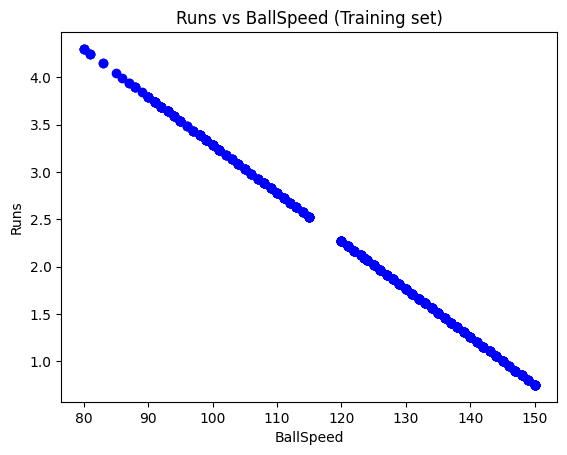

In [28]:
##plt.scatter(X_train, y_train, color = 'red')
plt.scatter(X_train, model.predict(X_train), color = 'blue')
plt.title('Runs vs BallSpeed (Training set)')
plt.xlabel('BallSpeed')
plt.ylabel('Runs')
plt.show()

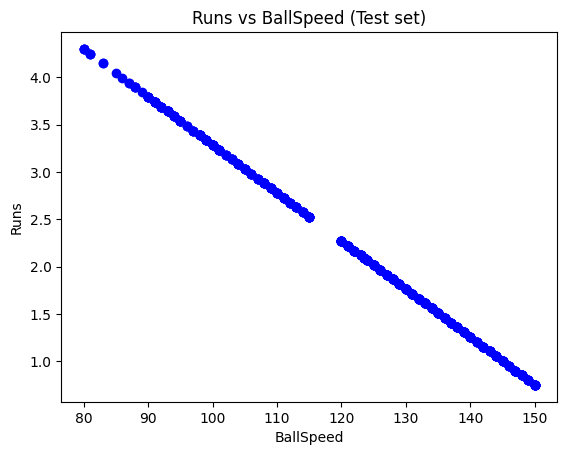

In [29]:
#plt.scatter(X_test, y_test, color = 'red')
plt.scatter(X_train, model.predict(X_train), color = 'blue')
plt.title('Runs vs BallSpeed (Test set)')
plt.xlabel('BallSpeed')
plt.ylabel('Runs')
plt.show()

Text(0.5, 1.0, 'Matches won by the teams')

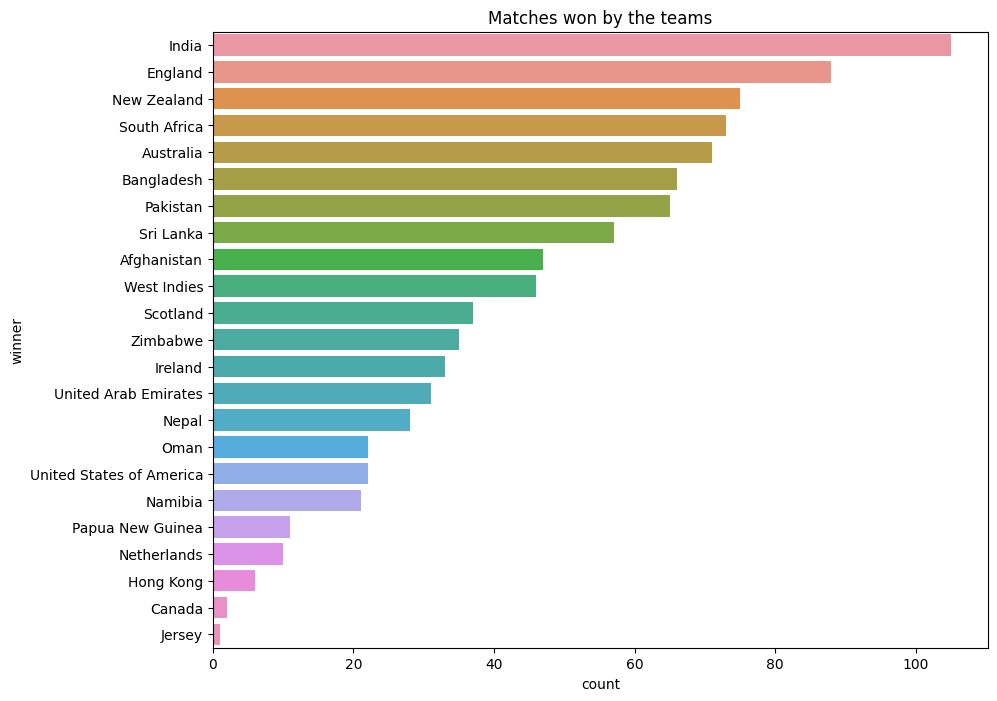

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.offline as pyo
import plotly.graph_objs as go
import plotly.express as ex

plt.figure(figsize=(10,8))
sns.countplot(y='winner', data=data2,order=data2['winner'].value_counts().index)
plt.title("Matches won by the teams")

Text(0.5, 1.0, 'Matches played in different Cities')

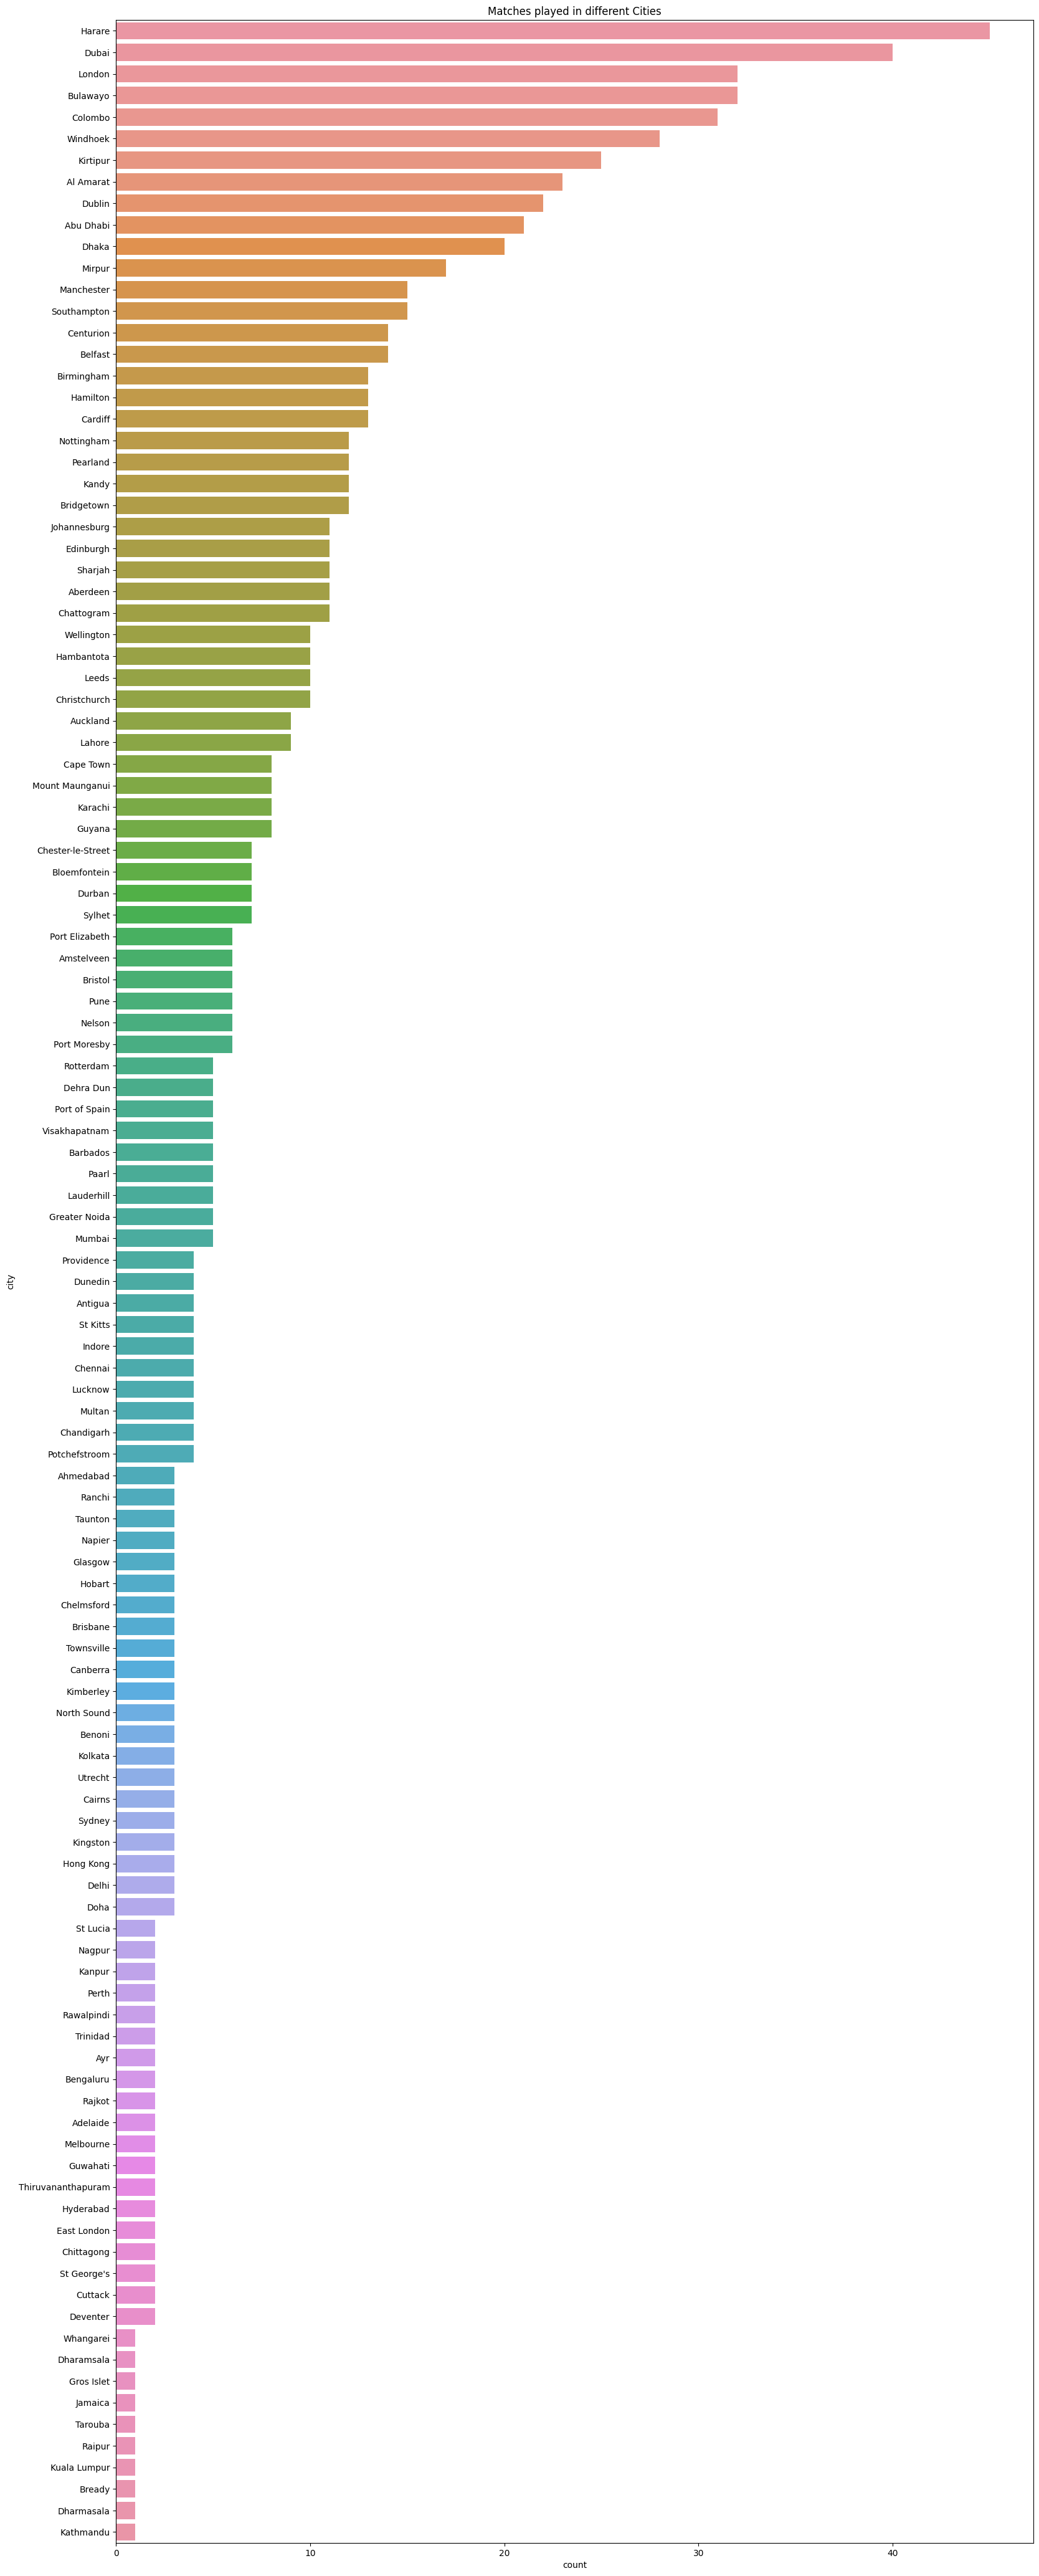

In [31]:
#Matches played in different cities
plt.figure(figsize=(19,999/19))
sns.countplot(y='city', data=data2,order=data2['city'].value_counts().index)
plt.title("Matches played in different Cities")

Text(0.5, 1.0, 'Matches played in different stadium')

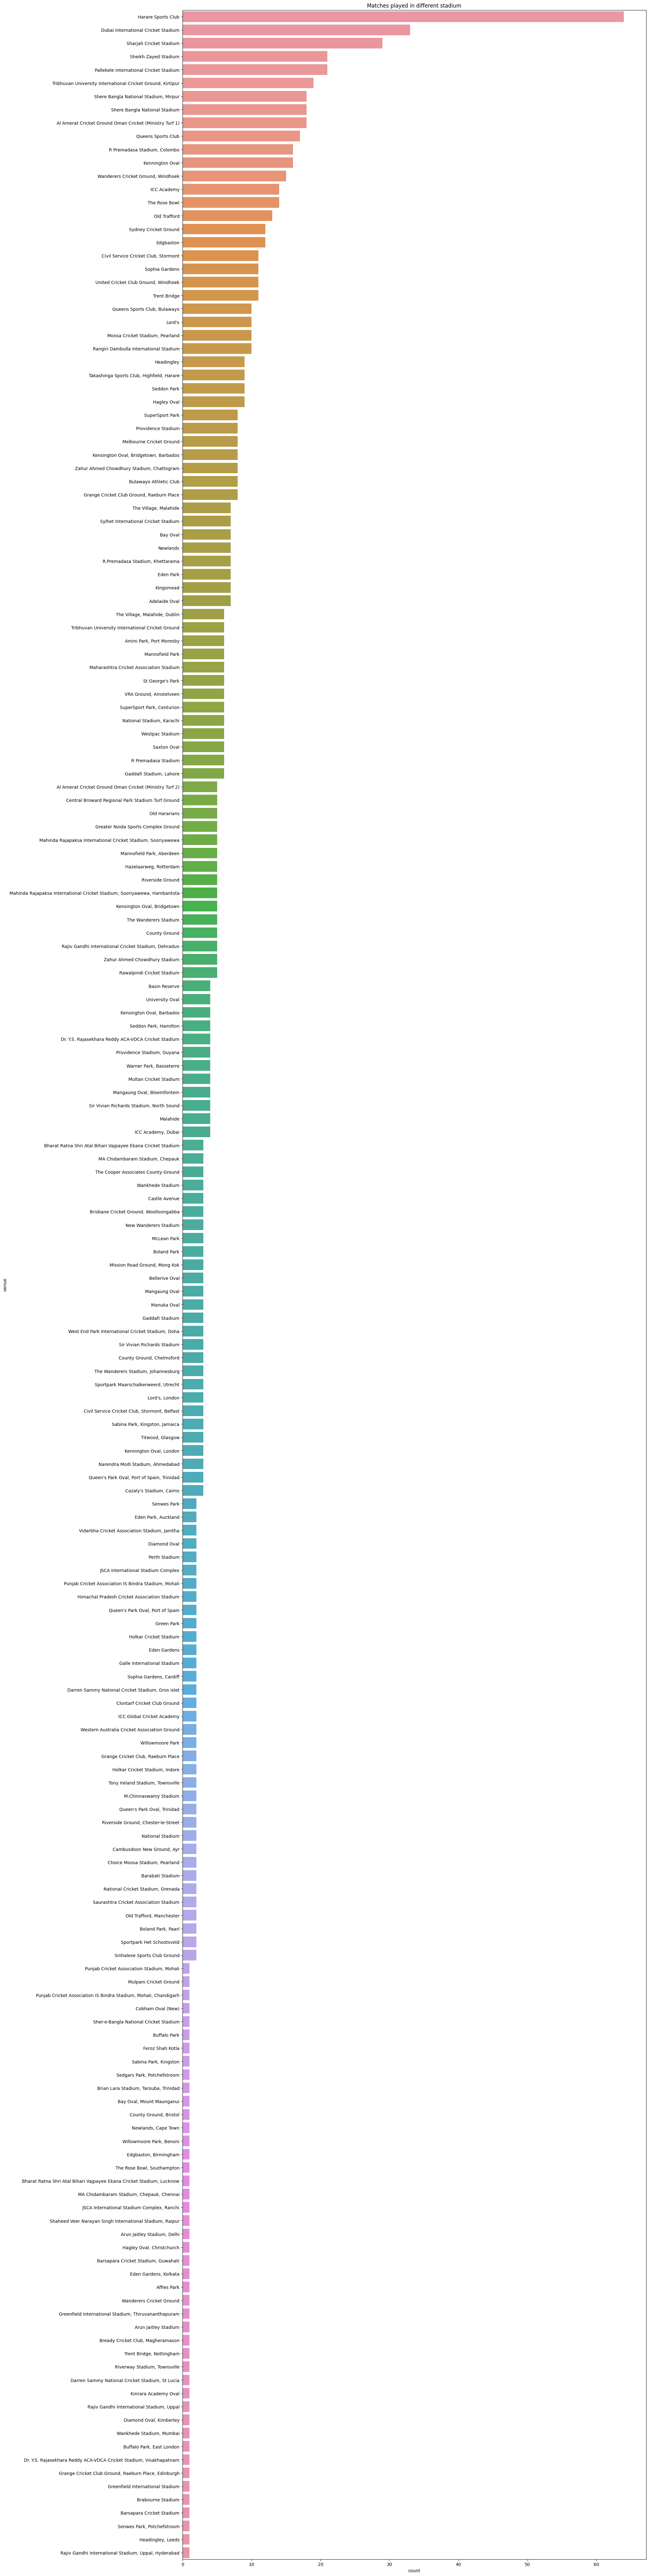

In [32]:
plt.figure(figsize=(19,999/19 * 2))
sns.countplot(y='venue', data=data2,order=data2['venue'].value_counts().index)
plt.title("Matches played in different stadium")

Text(0.5, 1.0, 'Player of The Match')

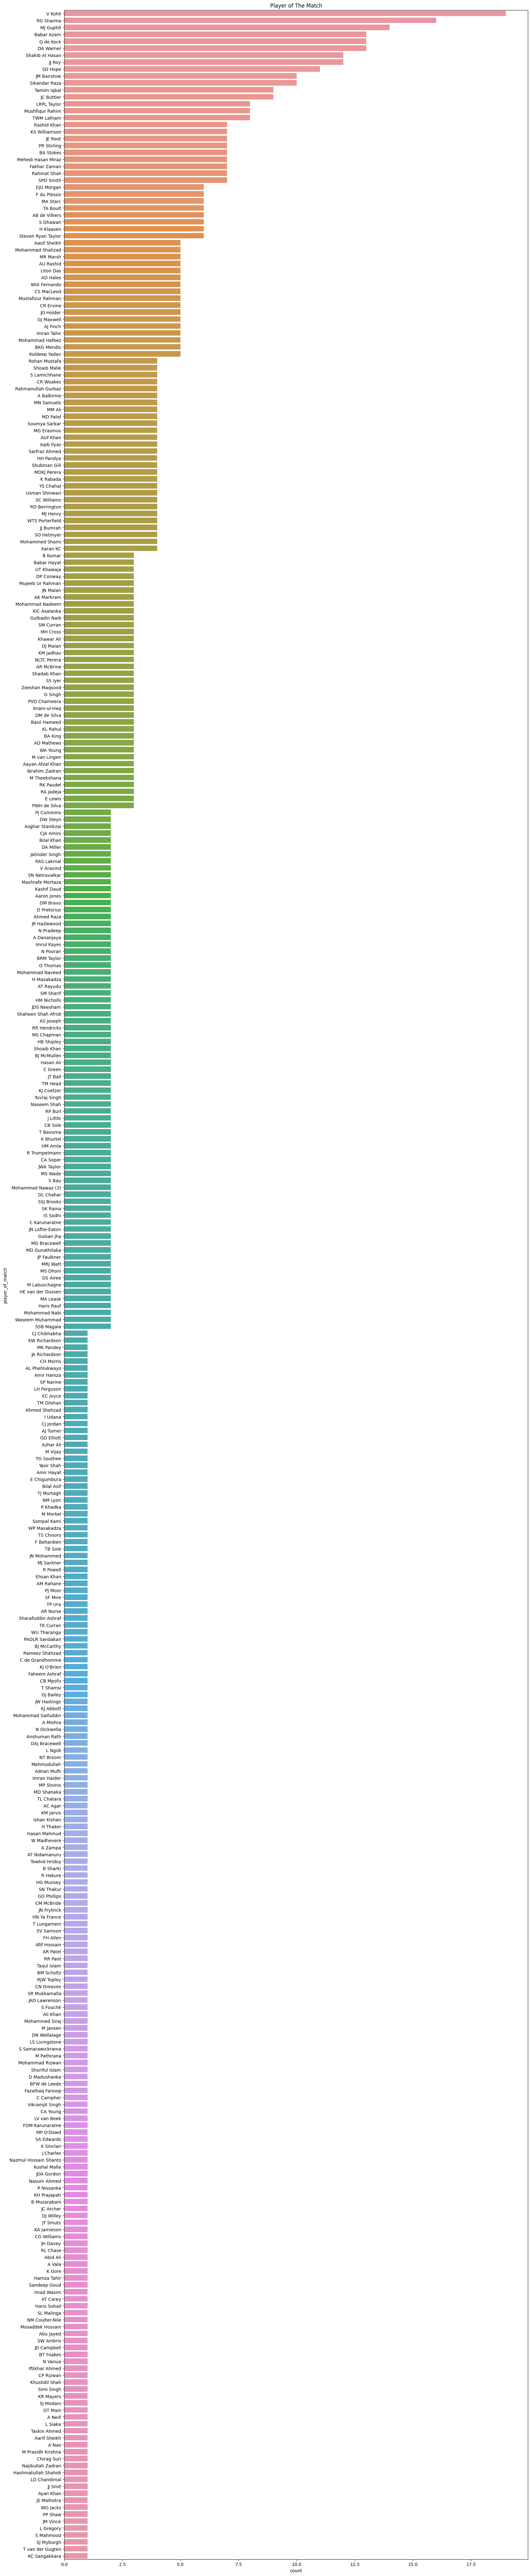

In [33]:
plt.figure(figsize=(19, 999/19 * 2))
sns.countplot(y='player_of_match', data=data2, order=data2['player_of_match'].value_counts().index)
plt.title("Player of The Match")


Text(0.5, 1.0, 'Decision to field or bat depending on toss')

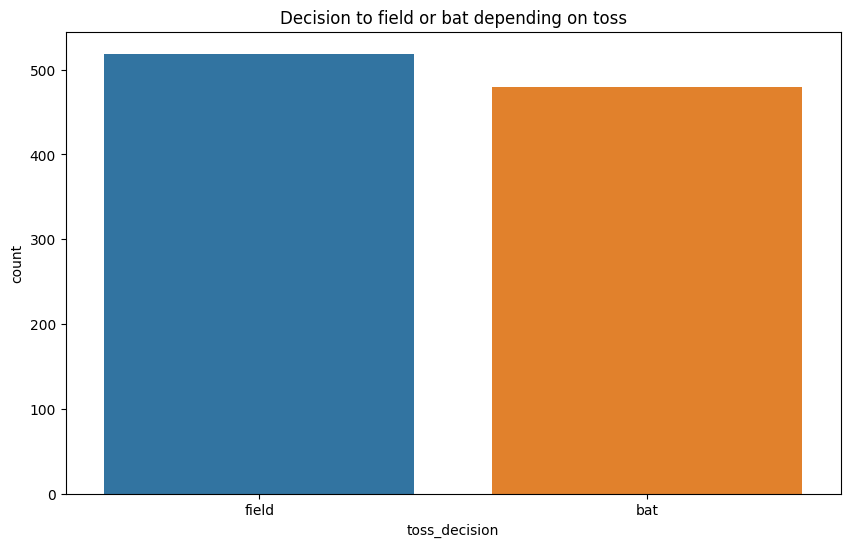

In [34]:
plt.figure(figsize=(10, 6))
sns.countplot(x='toss_decision', data=data2)
plt.title("Decision to field or bat depending on toss")


Text(0.5, 1.0, 'Win run differences')

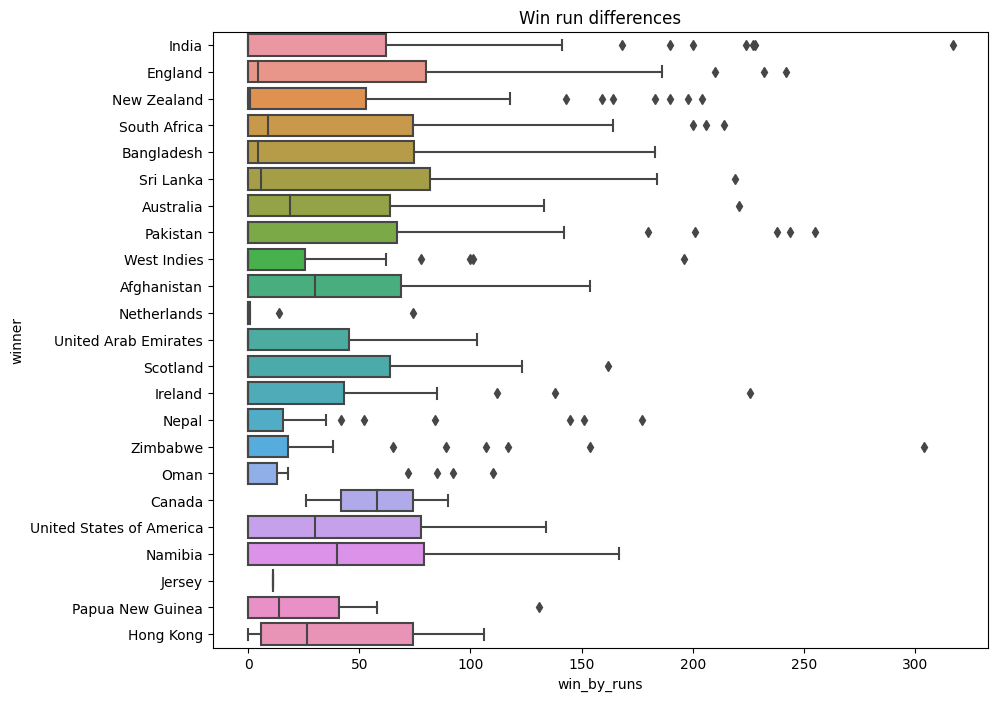

In [35]:
plt.figure(figsize=(10,8))
sns.boxplot(y='winner', x='win_by_runs', data=data2)
plt.title("Win run differences")

Text(0.5, 1.0, 'Wicket differences')

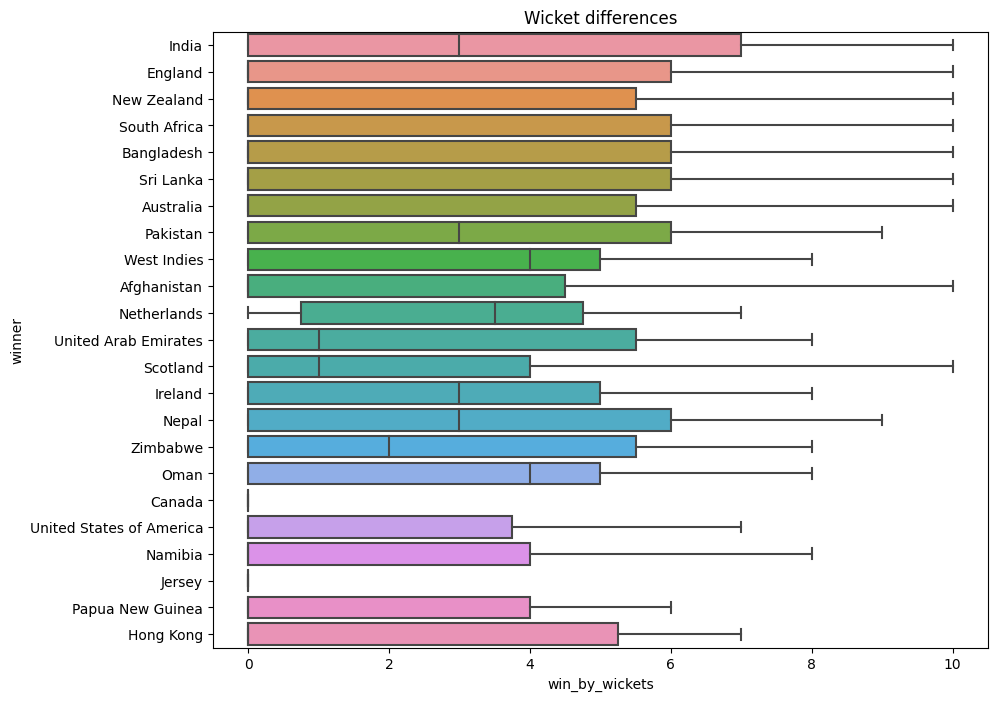

In [36]:
plt.figure(figsize=(10,8))
sns.boxplot(y='winner', x='win_by_wickets', data=data2)
plt.title("Wicket differences")

Text(0.5, 1.0, 'Toss Decision Distribution by Season (Bigger)')

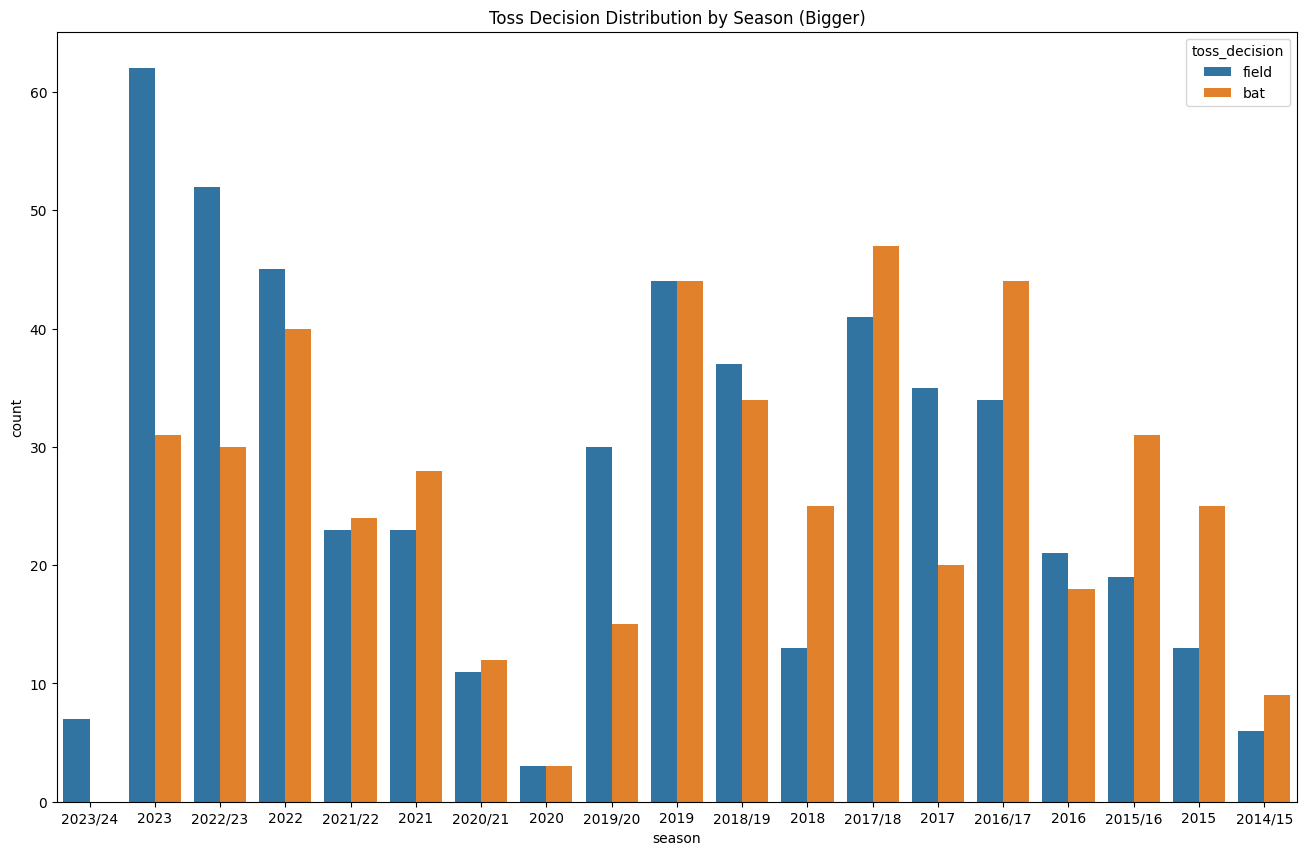

In [37]:
plt.figure(figsize=(16, 10))
sns.countplot(x='season', hue='toss_decision', data=data2)
plt.title("Toss Decision Distribution by Season (Bigger)")
